# Using the Embeddings for Customer Clustering
This is the second stage of creating a customer cluster, for the first notebook see `pykeen_rate_beer.ipynb`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pykeen.pipeline import PipelineResult
from pykeen.models import TransE
from pykeen.triples import TriplesFactory
from pykeen.constants import PYKEEN_CHECKPOINTS
from pykeen.pipeline.plot_utils import plot_er

import torch
from clustering.rate_beer_loader import RateBeerLoader

## Load the model and data
In our previous notebook we trained and saved the knowledge graph embedding as well as the triples factory both of which we will reload here.

In [3]:
model = torch.load("transe_trained/trained_model.pkl")

In [4]:
triples_factory = TriplesFactory.from_path_binary("transe_trained/training_triples")
triples_factory.num_triples

/home/sora4222/anaconda3/envs/unsupervised/lib/python3.10/site-packages/pykeen/triples/triples_factory.py:1083: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


33384705

In [5]:
triples_factory.entity_to_id

{0: 0,
 1: 1,
 10: 2,
 100: 3,
 1000: 4,
 10000: 5,
 100000: 6,
 1000000: 7,
 1000001: 8,
 1000002: 9,
 1000003: 10,
 1000004: 11,
 1000005: 12,
 1000006: 13,
 1000007: 14,
 1000008: 15,
 1000009: 16,
 100001: 17,
 1000010: 18,
 1000011: 19,
 1000012: 20,
 1000013: 21,
 1000014: 22,
 1000015: 23,
 1000016: 24,
 1000017: 25,
 1000018: 26,
 1000019: 27,
 100002: 28,
 1000020: 29,
 1000021: 30,
 1000022: 31,
 1000023: 32,
 1000024: 33,
 1000025: 34,
 1000026: 35,
 1000027: 36,
 1000028: 37,
 1000029: 38,
 100003: 39,
 1000030: 40,
 1000031: 41,
 1000032: 42,
 1000033: 43,
 1000034: 44,
 1000035: 45,
 1000036: 46,
 1000037: 47,
 1000038: 48,
 1000039: 49,
 100004: 50,
 1000040: 51,
 1000041: 52,
 1000042: 53,
 1000043: 54,
 1000044: 55,
 1000045: 56,
 1000046: 57,
 1000047: 58,
 1000048: 59,
 1000049: 60,
 100005: 61,
 1000050: 62,
 1000051: 63,
 1000052: 64,
 1000053: 65,
 1000054: 66,
 1000055: 67,
 1000056: 68,
 1000057: 69,
 1000058: 70,
 1000059: 71,
 100006: 72,
 1000060: 73,
 100006

Above we see the id map that the triples factory has for the entity's. These are not the embeddings though the embeddings are vectors.
To get the embeddings Pykeen stores them within a list for the models.
As a `TransE` model only has a single embedding for an entity or relationship the embeddings need to be extracted as the first element in a list.
This is different to other models which can have multiple embeddings for a single entity.
When the embeddings ob

In [6]:
entity_embeddings = model.entity_representations[0]

In [7]:
# Load the users/reviewers
pykeen_rate_beer = RateBeerLoader("ratebeer.txt")
pykeen_rate_beer.load_rate_beer()
reviewers = list(pykeen_rate_beer.all_reviewers)
reviewers

['jarikumpul',
 'Gramoit',
 'dsean',
 'Chubbard99',
 'drmatt',
 'nkwarrior',
 'tugeagon',
 'cengizsen',
 'Avengedpoet',
 'jarspag',
 'LabattBlue1977',
 'nearbeer',
 'Puffy',
 'mcox90',
 '13allison',
 'nsa144',
 'DRi',
 'Brewmaster1',
 'droepke99',
 'polkadot80',
 'sjge01',
 'soulgrowl',
 'theyshookhands',
 'brewbeast',
 'chestbuster99',
 'M_Jager',
 'Hogspit',
 'samuelsmithman',
 'BeerBrain',
 'kettlekorn',
 'engmaher1',
 'westasleep',
 'brian1233',
 'westexans',
 'brewtopian',
 'mitch3499',
 'Boris2',
 'Demise',
 'Jarmby',
 'mark_booth',
 'bobjbkln',
 'zer0514',
 'biggmike',
 'thelordthygod',
 'UMNBeerhunter',
 'dhlesq',
 'gregmsu99',
 '1Adam12',
 'ElCommodoro',
 'rockstar3319',
 'Saaz',
 'eric_victor',
 'calcampbell99',
 'cheme24',
 'k9coug',
 'Hudspart',
 'Chipper',
 'nflmvp',
 'fratmonkey',
 'dkarp',
 'beerguy123',
 'SavMan',
 'NYMojoMan',
 'annahawk',
 'bla15',
 'tipsytoad',
 'stulindbrew',
 'cexshun',
 'HopsformyHips',
 'bittermestupid',
 'hillfiiiiire',
 'Naven',
 'Myklanjlo',
 

In [17]:
reviewers_ids = {reviewer_name: triples_factory.entity_to_id["pro" + reviewer_name] for reviewer_name in reviewers}
reviewers_ids

{'jarikumpul': 3053944,
 'Gramoit': 3039160,
 'dsean': 3051081,
 'Chubbard99': 3037184,
 'drmatt': 3051010,
 'nkwarrior': 3058072,
 'tugeagon': 3062765,
 'cengizsen': 3049179,
 'Avengedpoet': 3035411,
 'jarspag': 3053952,
 'LabattBlue1977': 3040939,
 'nearbeer': 3057885,
 'Puffy': 3043120,
 'mcox90': 3056761,
 '13allison': 3034718,
 'nsa144': 3058183,
 'DRi': 3037539,
 'Brewmaster1': 3036560,
 'droepke99': 3051013,
 'polkadot80': 3059094,
 'sjge01': 3060818,
 'soulgrowl': 3061153,
 'theyshookhands': 3062236,
 'brewbeast': 3048510,
 'chestbuster99': 3049316,
 'M_Jager': 3041368,
 'Hogspit': 3039539,
 'samuelsmithman': 3060258,
 'BeerBrain': 3035747,
 'kettlekorn': 3055306,
 'engmaher1': 3051527,
 'westasleep': 3063371,
 'brian1233': 3048570,
 'westexans': 3063377,
 'brewtopian': 3048563,
 'mitch3499': 3057175,
 'Boris2': 3036430,
 'Demise': 3037801,
 'Jarmby': 3040170,
 'mark_booth': 3056474,
 'bobjbkln': 3048243,
 'zer0514': 3063880,
 'biggmike': 3047899,
 'thelordthygod': 3062161,
 'U

Now that we have all of the reviewers ids let's get the corresponding embeddings to display that these exist.

In [32]:
indices = torch.tensor(list(reviewers_ids.values()))
entity_embeddings_tensor = entity_embeddings(indices=indices)
entity_embeddings = entity_embeddings_tensor.cpu().detach().numpy()

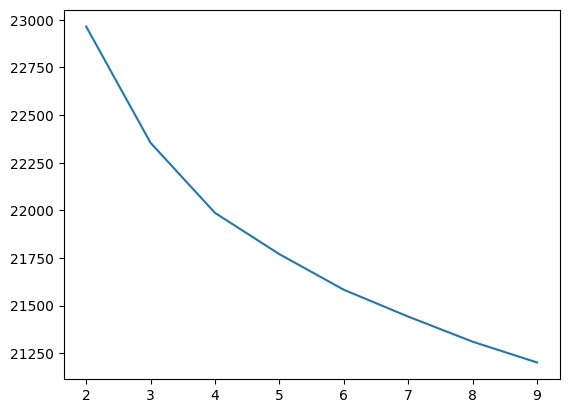

In [41]:
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
kmeans_clustering_models = [KMeans(n_clusters=i) for i in range(2, 10)]
scores = []
for clustering_model in kmeans_clustering_models:
    clustering_model.fit(entity_embeddings)
    scores.append(clustering_model.inertia_)
plt.plot(list(range(2,10)), scores)